In [1]:
import sys
sys.path.append('../')

In [2]:
from metrics.metrics import *

import numpy as np
import torch
from utils.parameters import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
n_classes = 3

masks = torch.LongTensor((np.random.rand(18, 200, 200)>0.5).astype(np.int))
masks[:100, :100, :10] = 2
y_preds = torch.FloatTensor(np.random.rand(18, n_classes, 200, 200))

metrics = ['acc', 'conf', 'prob_conf', 'splits', 'pred']

In [14]:
def getProbabilityConf(y, y_pred, is_softmax=False, ret_type=None, i2n=index2name):
    if not is_softmax:
        y_pred = torch.nn.Softmax(dim=1)(y_pred)

    conf = defaultdict(dict)
    print(y.shape, y_pred.shape)
    for (key1, val1) in index2name.items():
        y_gt_mask = y==key1
        for (key2, val2) in index2name.items():
            y_pred_val = y_pred[:, key2, :, :][y_gt_mask]
            avg_prob = np.mean(y_pred_val.numpy())
            conf[val1][val2] = avg_prob

    if ret_type is not None:
        conf = conf_operations(conf, ret_type=ret_type, debug=False, i2n=i2n)

    return conf


torch.Size([18, 200, 200]) torch.Size([18, 3, 200, 200])


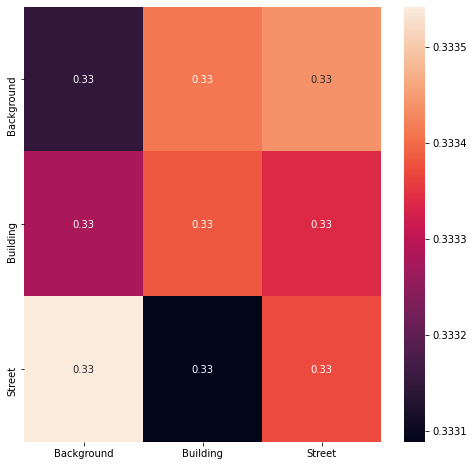

In [15]:
# gatherMetrics(
#         params=(masks, y_preds),
#         metrics=metrics,
#         mode='val',
#         i2n=index2name,
# )
getProbabilityConf(masks, y_preds, is_softmax=False, ret_type='plt_fig')

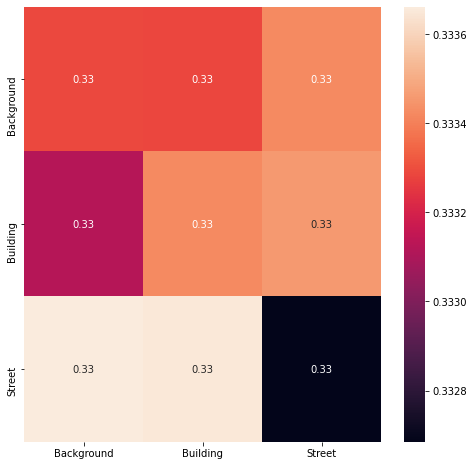

In [18]:
getProbabilityConf(masks, y_preds, is_softmax=False, ret_type='plt_fig', i2n=index2name)